In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [2]:
df = pd.read_csv('reddit-india-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   flair      1118 non-null   object
 1   title      1118 non-null   object
 2   score      1118 non-null   int64 
 3   id         1118 non-null   object
 4   url        1118 non-null   object
 5   comms_num  1118 non-null   int64 
 6   body       677 non-null    object
 7   author     1118 non-null   object
 8   comments   1019 non-null   object
 9   timestamp  1118 non-null   object
dtypes: int64(2), object(8)
memory usage: 87.5+ KB


In [3]:
df['comments']=df['comments'].fillna("")
df['body']=df['body'].fillna("")

In [15]:
df['title word len'] = list(map(lambda x: len(x.split()) , df['title']  ))
df['body word len'] = list(map(lambda x: len(x.split()) , df['body']  ))
df['comments word len'] = list(map(lambda x: len(x.split()) , df['comments']  ))
df['combined'] = df['title'] + df['body'] + df['comments']
df['combined word len'] = list(map(lambda x: len(x.split()) , df['combined']  ))


In [16]:
df['flair'].value_counts()

Scheduled             100
Science/Technology    100
Business/Finance      100
AskIndia              100
AMA                   100
Food                  100
Sports                100
Politics              100
Non-Political         100
Photography           100
Policy/Economy        100
[R]eddiquette          18
Name: flair, dtype: int64

Text(0, 0.5, 'Average number of comments')

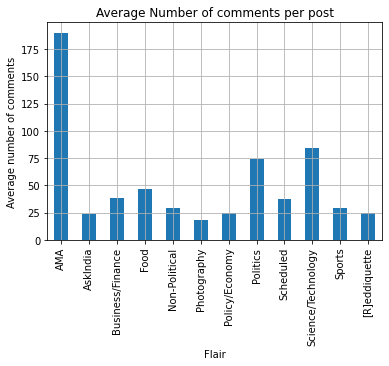

In [17]:
df_cn = df.groupby("flair").mean()[['comms_num']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Average number of comments")

Text(0, 0.5, 'Average number of combined words in data')

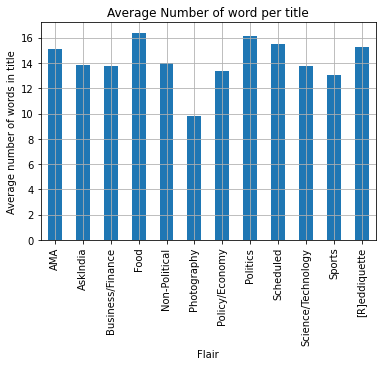

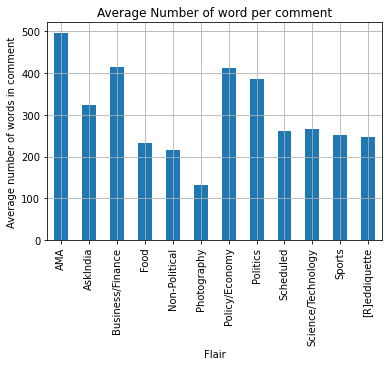

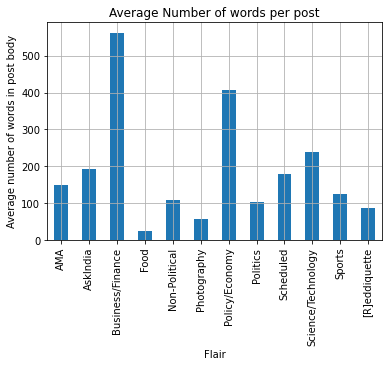

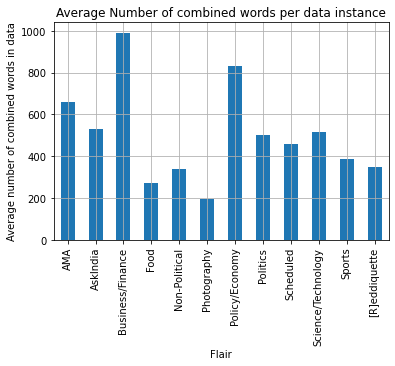

In [19]:
df_cn = df.groupby("flair").mean()[['title word len']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of word per title")

plt.xlabel("Flair")
plt.ylabel("Average number of words in title")

df_cn = df.groupby("flair").mean()[['comments word len']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of word per comment")

plt.xlabel("Flair")
plt.ylabel("Average number of words in comment")
df_cn = df.groupby("flair").mean()[['body word len']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of words per post")

plt.xlabel("Flair")
plt.ylabel("Average number of words in post body")

df_cn = df.groupby("flair").mean()[['combined word len']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of combined words per data instance")

plt.xlabel("Flair")
plt.ylabel("Average number of combined words in data")

In [20]:
print(df['title word len'].describe())
print(df['body word len'].describe())
df['comments word len'].describe()
df['combined word len'].describe()

count    1118.000000
mean       14.083184
std         8.960236
min         1.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        57.000000
Name: title word len, dtype: float64
count    1118.000000
mean      193.136852
std       498.253614
min         0.000000
25%         0.000000
50%        42.500000
75%       154.000000
max      6215.000000
Name: body word len, dtype: float64


count    1118.000000
mean      514.306798
std       701.161275
min         5.000000
25%       105.250000
50%       280.000000
75%       628.750000
max      7445.000000
Name: combined word len, dtype: float64

Text(0, 0.5, 'Number of posts')

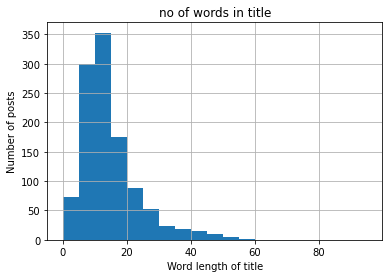

In [21]:
df['title word len'].hist(bins = range(0,100,5))
plt.title("no of words in title")
plt.xlabel("Word length of title")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

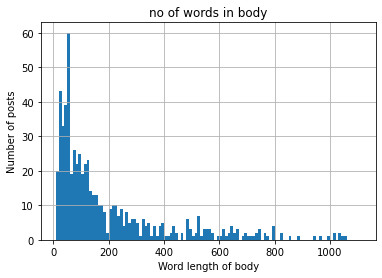

In [22]:
df['body word len'].hist(bins = range(10,len(df),10))
plt.title("no of words in body")
plt.xlabel("Word length of body")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

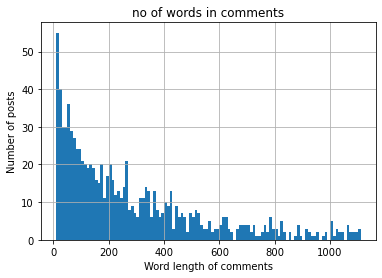

In [23]:
df['comments word len'].hist(bins = range(10,len(df),10))
plt.title("no of words in comments")
plt.xlabel("Word length of comments")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

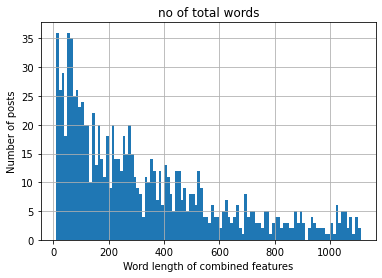

In [24]:
df['combined word len'].hist(bins = range(10,len(df),10))
plt.title("no of total words")
plt.xlabel("Word length of combined features")
plt.ylabel("Number of posts")

In [32]:
df.quantile(0.75)

score                118.75
comms_num             40.75
title word len        17.00
body word len        154.00
comments word len    409.00
combined word len    628.75
Name: 0.75, dtype: float64

In [49]:
len(df[df['combined word len'] <= 700])/len(df)

0.7790697674418605

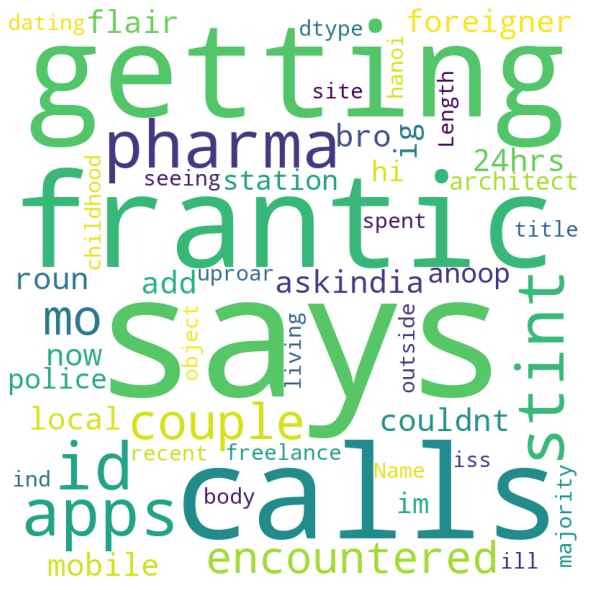

In [36]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(df['body'])) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

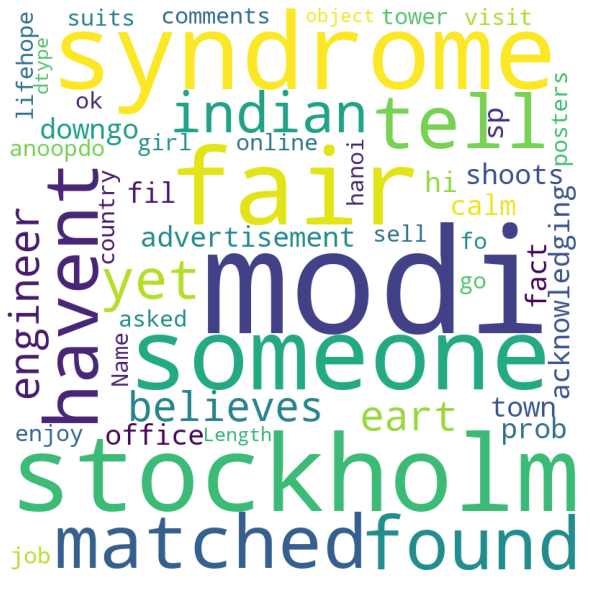

In [37]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(df['comments'])) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

AskIndia


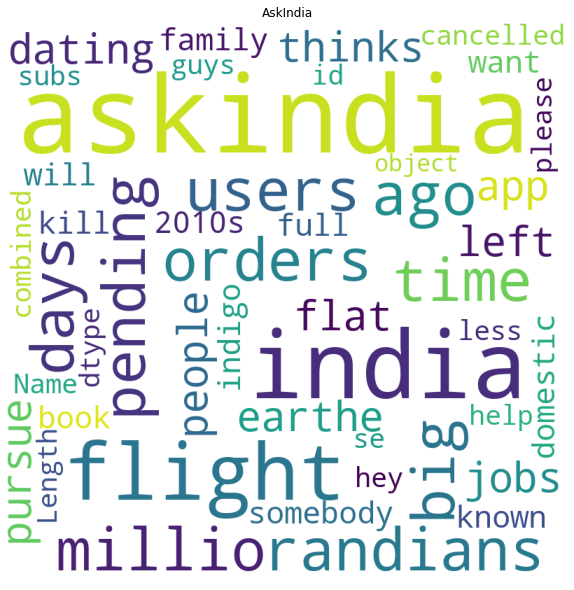

Non-Political


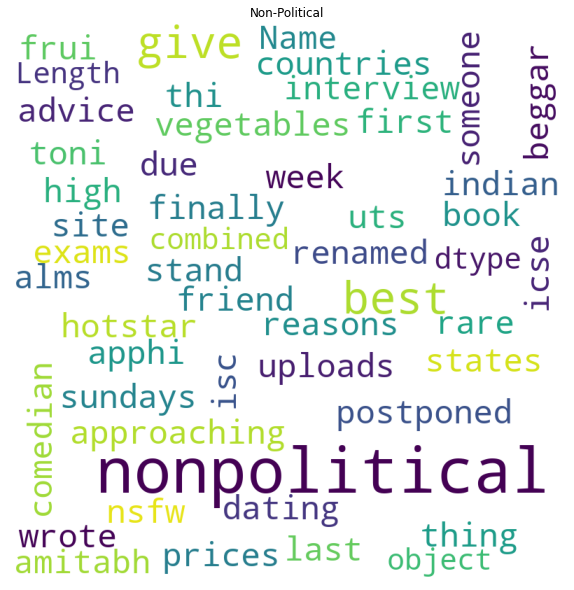

[R]eddiquette


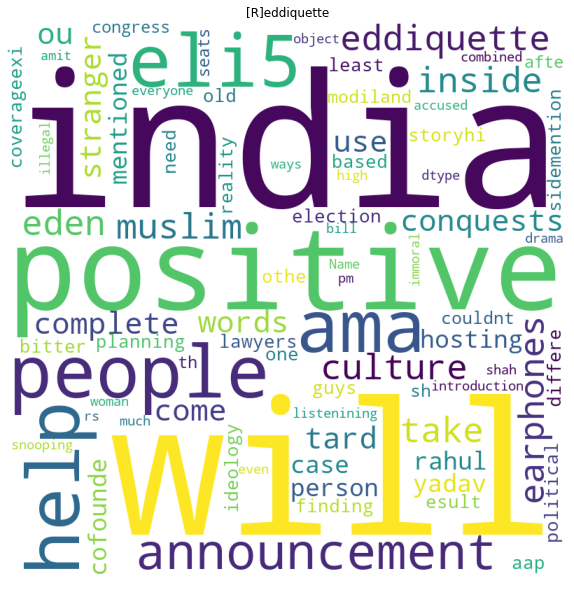

Scheduled


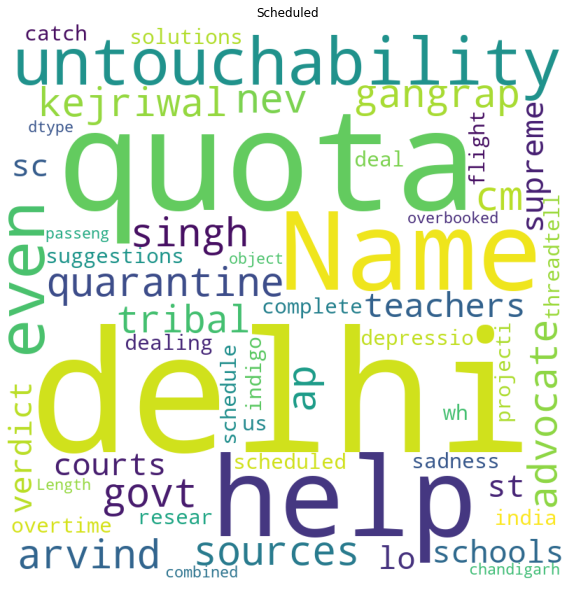

Photography


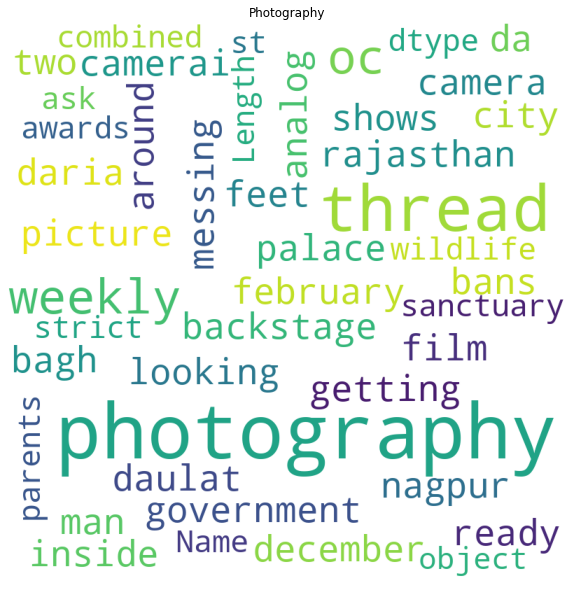

Science/Technology


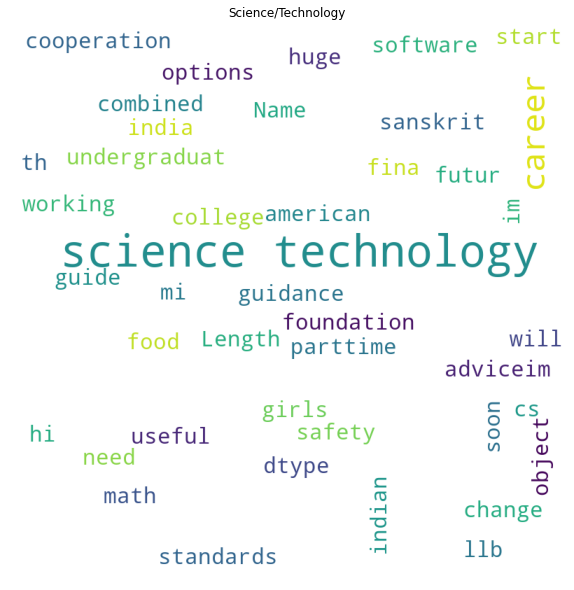

Politics


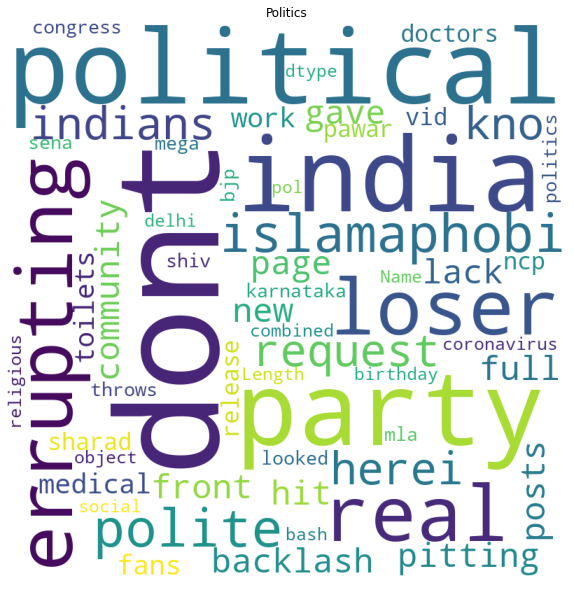

Business/Finance


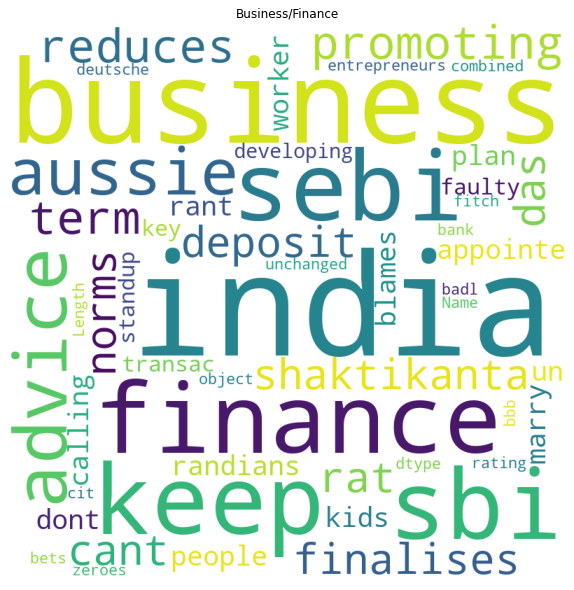

Policy/Economy


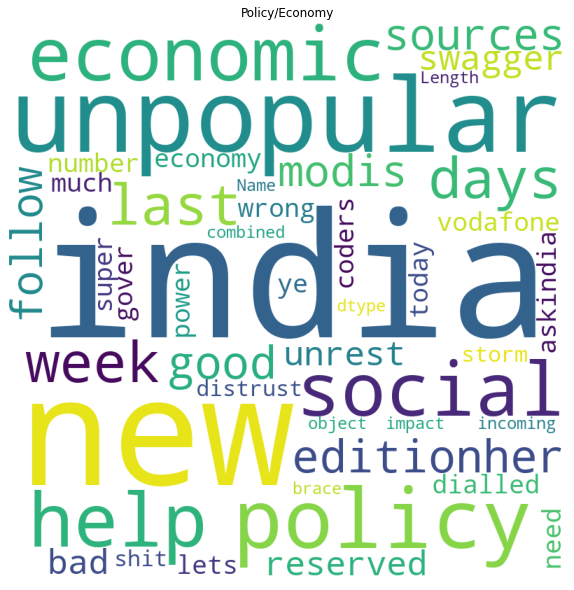

Sports


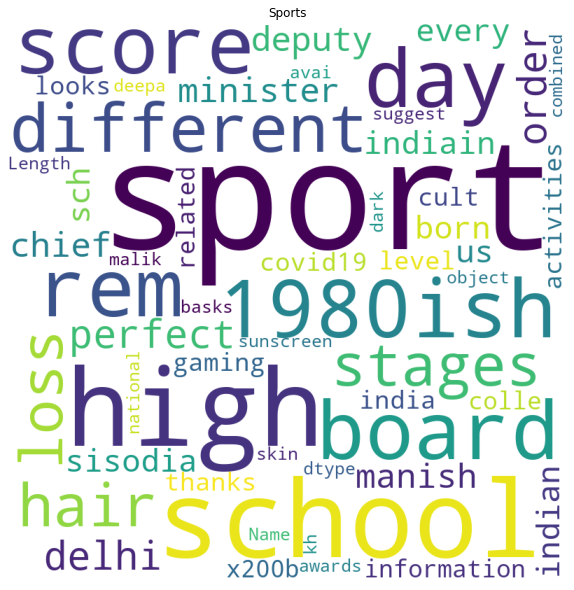

Food


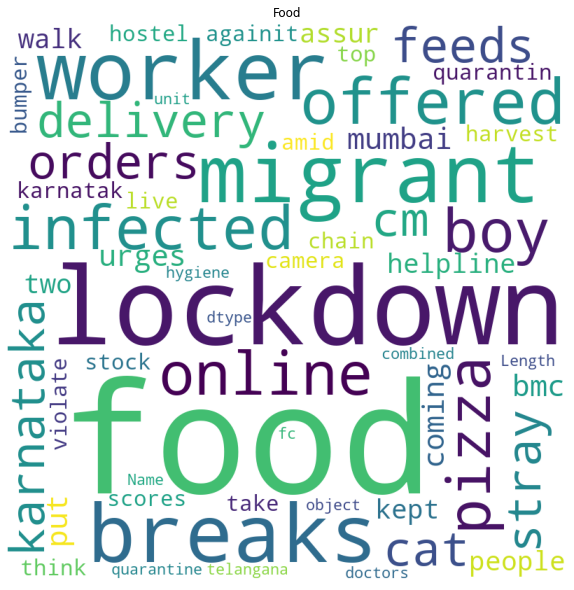

AMA


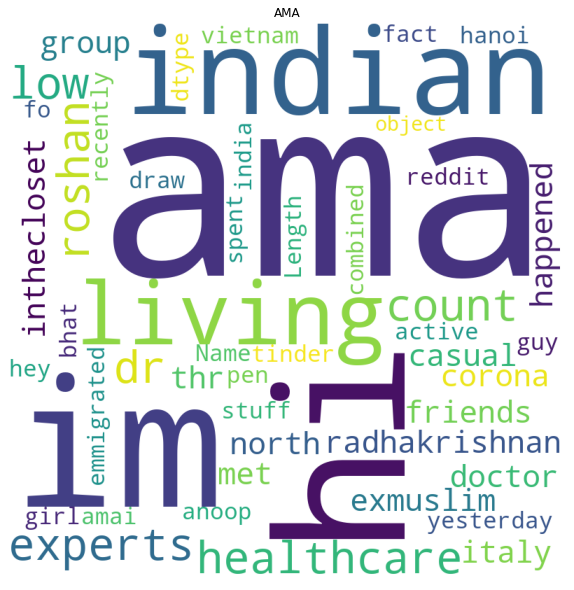

In [45]:
for fl in list(df['flair'].unique()):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(str(df[df['flair'] == fl]['combined'])) 
# plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.title(fl)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    print(fl)
    plt.show() 